# HEART  DISEASE  PREDICTION 

# 1. Importing the libraries

In [1]:
import pandas as pd

# 2. Importing the Dataset

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# 3. Taking care of missing values

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 4.Taking care of missing values

In [6]:
data_dup=data.duplicated().any()
data_dup

True

In [7]:
data=data.drop_duplicates()

In [8]:
data_dup=data.duplicated().any()
data_dup

False

# 5. Data Processing

In [9]:
cate_val=[]  #categorical values
cont_val=[]  #continous values(numerical values)

for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [12]:
cate_val.remove("sex")
cate_val.remove("target")
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [13]:
data.head(6)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5,58,0,100,248,122,1.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# 7. Feature Scaling

In [14]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [17]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# 8. Splitting the Dataset into the Training set and Test set

In [18]:
X=data.drop("target",axis=1)

In [19]:
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
y=data["target"]

In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 9. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred1=log.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

# 10. Support vector classifier(SVC)

In [29]:
from sklearn import svm

In [30]:
svm=svm.SVC() #instance of SVC

In [31]:
svm.fit(X_train,y_train)

SVC()

In [32]:
y_pred2=svm.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

# 11. KNeighbors Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn=KNeighborsClassifier()

In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred3=knn.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [39]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

# 11. Non-Linear ML Algorithms 

In [40]:
data=pd.read_csv("heart.csv")

In [41]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [42]:
data=data.drop_duplicates()

In [43]:
data.shape

(302, 14)

In [44]:
X=data.drop("target",axis=1)
y=data["target"]

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 12. Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier 

In [47]:
dt=DecisionTreeClassifier()

In [48]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred4=dt.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

# 13. Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf=RandomForestClassifier()

In [53]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
y_pred5=rf.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

# 14. Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gbc=GradientBoostingClassifier()

In [58]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [59]:
y_pred6=gbc.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [61]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                                   'ACC':[accuracy_score(y_test,y_pred1),
                                          accuracy_score(y_test,y_pred2),
                                         accuracy_score(y_test,y_pred3),
                                         accuracy_score(y_test,y_pred4),
                                         accuracy_score(y_test,y_pred5),
                                         accuracy_score(y_test,y_pred6)]})

In [62]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.786885
4,RF,0.836066
5,GB,0.803279


In [63]:
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

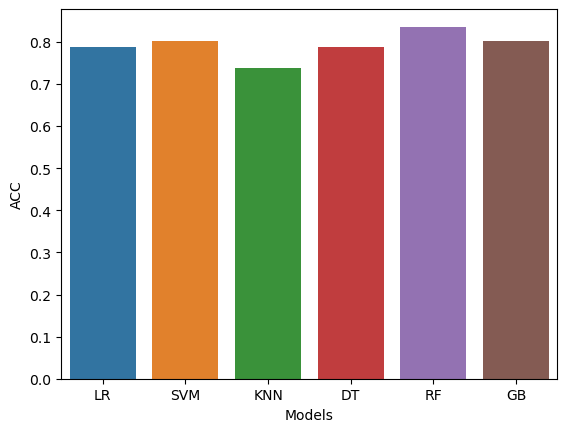

In [64]:
sns.barplot(final_data["Models"],final_data["ACC"])

In [65]:
X=data.drop("target",axis=1)
y=data["target"]

In [66]:
X.shape

(302, 13)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

# 15. Prediction on New Data

In [69]:
import pandas as pd

In [70]:
new_data=pd.DataFrame({
    "age":52,
    "sex":1,
    "cp":0,
    "trestbps":125,
    "chol":212,
    "fbs":0,
    "restecg":1,
    "thalach":168,
    "exang":0,
    "oldpeak":1.0,
    "slope":2,
    "ca":2,
    "thal":3,
},index={0})

In [71]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [72]:
p=rf.predict(new_data)
if p[0]==0:
    print("No Heart Disease")
else:
    print("Heart Disease")

No Heart Disease


# 16. Save Model Using Joblib

In [73]:
import joblib

In [74]:
joblib.dump(rf,"model_joblib_heart")

['model_joblib_heart']

In [75]:
 model=joblib.load("model_joblib_heart")

In [76]:
 model.predict(new_data)

array([0], dtype=int64)

# GUI

In [77]:
from tkinter import *
import joblib

In [83]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    
    model=joblib.load("model_joblib_heart")
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    
    if result==0:
        Label(master,text="No Heart Diseases").grid(row=31)
    else:
        Label(master,text="Possibility of Heart Diseases").grid(row=31)

master=Tk()
master.title("Heart Disease Prediction System ")
master.geometry("300x350")
master.configure(bg="pink")

label=Label(master,text="Heart Disease Prediction System",bg="black",fg="white").grid(row=0,columnspan=2)

Label(master,text="Enter your age : ").grid(row=1)
Label(master,text="Male or Female [1/0] : ").grid(row=2)
Label(master,text="Enter value of cp : ").grid(row=3)
Label(master,text="Enter value of trestbps : ").grid(row=4)
Label(master,text="Enter value of chol : ").grid(row=5)
Label(master,text="Enter value of fbs : ").grid(row=6)
Label(master,text="Enter value of restecg : ").grid(row=7)
Label(master,text="Enter value of thalach : ").grid(row=8)
Label(master,text="Enter value of exang : ").grid(row=9)
Label(master,text="Enter value of oldpeak : ").grid(row=10)
Label(master,text="Enter value of slope : ").grid(row=11)
Label(master,text="Enter value of ca : ").grid(row=12)
Label(master,text="Enter value of thal : ").grid(row=13)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
e11=Entry(master)
e12=Entry(master)
e13=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)

Button(master,text="Predict",command=show_entry_fields).grid()
mainloop()


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
